In [3]:
#숫자 처리/그림 그리기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #차트그리기

# 딥러닝 모델/학습도구
import torch 
import torch.nn as nn #리니어나 ~ 랠루나 모델 가지고 있어
import torch.nn.functional as F
import torch.optim as optim #함수 최적화

#이미지 데이터셋과 전처리
import torchvision.datasets as datasets 
import torchvision.transforms as transforms #이미지 크기

#데이터를 배치(batch)로 꺼내주기
from torch.utils.data import DataLoader #원하는 배치 모양으로 섞어서
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' 
#torch와 matplotlib 충돌 시 커널 죽는거 방지



MNIST는 training , test가 나눠져 있어서 train True 하면 트레이닝 모드 나눠져
root 달리쓰면 받은거 또 받아

우리는 이미지 크기가 일정한데, 나중에 사진 크기들이 다 다르면?
이미지 검색으로 찾는 형태로 할때, 사진 크기를 전체 어떻게 부르겠다. 
trasform 에서 처리
transform=transforms.Compose([transforms.ToTensor()])

In [4]:
mnist_train=datasets.MNIST(root='../data02/mnist_data', #없으면 다운받고 있으면 꺼내는 root
                           train=True,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))
mnist_test=datasets.MNIST(root='../data02/mnist_data',
                           train=False,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))

info는 판다스 전용 메서드고, mnist_train은 torchvision의 MNIST Dataset 객체라서 info가 안됨.
엑셀, csv, 표 형태 데이터(행/열) -> 표가 기본 단위인 것만 판다스로 다뤄.
MNIST는 표 파일이 아니야.


print(mnist_train)
print(mnist_test)


In [5]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data02/mnist_data
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data02/mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )


필기체 숫자 사진찍은 모음.
필기 글자는 검은색, 주변 음영은 회색, 없는데는 흰색

In [6]:
print(mnist_train.data.shape)
print(mnist_train.targets.shape)
print(mnist_test.data.shape)
print(mnist_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [10]:
for d in mnist_train.data.shape:
    print(d)

60000
28
28


In [7]:
type(mnist_train.data.shape)

torch.Size

In [8]:
tuple(mnist_train.data.shape)

(60000, 28, 28)

In [9]:
list(mnist_train.data.shape)

[60000, 28, 28]

훈련 이미지 6만장, 훈련 라벨 6만개


In [5]:
mnist_train.data[1]
mnist_train.targets[1]

tensor(0)

In [6]:
def plot(x,y):
  plt.figure(figsize=(8,10))
  for i in range(len(x)): #x의 갯수만큼 for문이 돈다
    plt.subplot(5,5, i+1) #행 5, 열 5개 순서는 i번째 +1가 현재 그려지는 차트
    img=(np.array(x[i], dtype='float')).reshape(28,28) # 3차원이면 2차원 이미지로 가져와라
    #우리는 tensor 상태이고 그림을 그릴려면 numpy배열이 필요해서 위처럼 잡아.
    plt.title(y[i].item()) #y[1]라고 텐서에 담긴걸 item()으로 꺼내와야지 그려
    plt.imshow(img, cmap='gray')
    plt.axis('off') 
  plt.show() #그림 하나, for문만큼 돌려

C:\Users\it\AppData\Local\Temp\ipykernel_6012\2301020375.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img=(np.array(x[i], dtype='float')).reshape(28,28) # 3차원이면 2차원 이미지로 가져와라


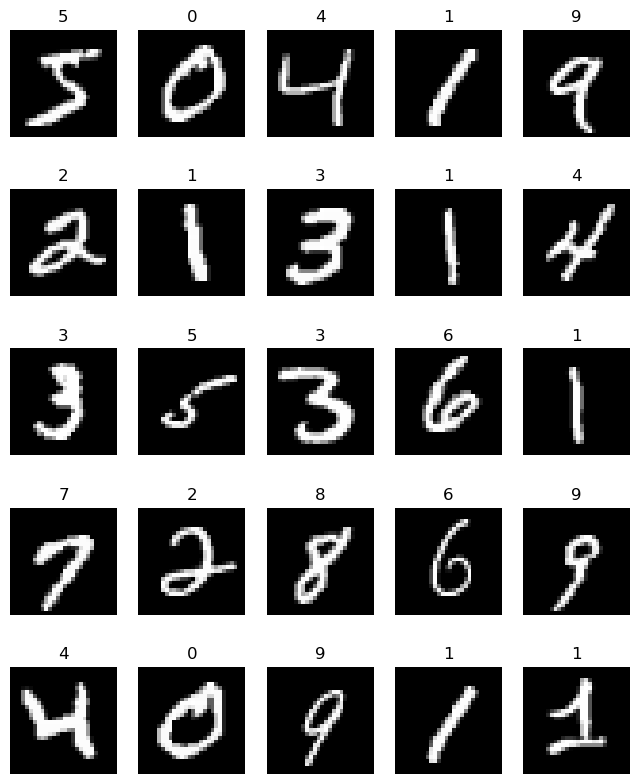

In [7]:
plot(mnist_train.data[:25], mnist_train.targets[:25]) #0~24까지 그려


실제 데이터값을 보자 0번

In [8]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

픽셀값에 /255 해서 입력을 정규화함.
이 칸을 얼마나 밝냐를 숫자로 적어놓은 지도, 0은 완전검정, 255는 완전 흰색
= 원본 이미지 숫자 표현.

경사하강법의 안정화를 위해 나눈거임. 값이 큼. gradient가 튀어. 값이 작고 일정하면 학습이 안정화됨.

활성함수 relu와 sigmoid는 0~1, -1~1 범위에서 잘 작동해

/255 는 입력하기 좋은 범위로 바꾸는 정규화

이미지 처리때는 계산할때 큰 값 계산, 자원이 많이 필요해서 0-1 사이 값으로 바꾸는게 좋아.


In [9]:
x=mnist_train.data.float()/255
y=mnist_train.targets #레이블은 0~9까지 숫자니까 그대로 받았어
x[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [10]:
x.size()

torch.Size([60000, 28, 28])

훈련시킬려면 3차원을 2차원으로 만들어야해
view로 만들어준다.

In [11]:
x=x.view(x.size(0),-1) #(0, 1, 2 이고 0은 그대로 쓰라는거, -1 은 28*28 그대로)
print(x.size())

torch.Size([60000, 784])


인풋사이즈를 만든다.

맨 마지막 차원의 값, -1

인풋데이터는 한 데이터의 입력사이즈

In [12]:
input_size=x.size(-1)
print(input_size) #-1이니까 784


784


제일 큰 값이 9일거래 +1 하면 10
뭐가 9인거야? -> 0부터 9까지의 숫자,

0이될 확률 몇퍼센트, 1이될 확률 몇퍼센트
아그멕스로 값의 인덱스를 가지고 오면 정답(?)

In [13]:
output_size=int(max(y))+1
print(output_size)

10


딥러닝에는 벨리데이션 데이터를 구해올거야.
데이터 어떻게 나눌지 비율을 잡았고

너무 훈련데이터만 하면 [과적합] 주의
훈련을 하면서도 손실함수를 계속 구함. 훈련데이터는 손실이 낮아지지만 검정데이터에서 높아지면 멈춰야해.
데이터가 많으면 훈련데이터의 일부를 검정데이터로 돌려서 사용

수동으로 어떻게 나누나. 사이키런으로는 나눠봤다.

1. 비율정하기
2. 트레이닝 갯수 = size0은 갯수, 60000 * 비율 0.8

In [14]:
ratio = [0.8, 0.2]
train_cnt=int(x.size(0)*ratio[0]) #60000*0.8
valid_cnt=int(x.size(0)*ratio[1]) #60000*0.2
test_cnt=len(mnist_test)
print(train_cnt, valid_cnt, test_cnt) #전체 데이터에서 쪼갰어

48000 12000 10000


크기를 나눴어.

In [15]:
cnts = [train_cnt, valid_cnt]

그냥 자르지 않고 섞었어.

In [16]:
indices = torch.randperm(x.size(0)) #60000개의 숫자를 랜덤하게 섞은 것
# indices[:20] 잘 섞였는지 확인 0-19까지 나올게 4 21 뭐 이렇게 섞여나와

#x의 숫자를 랜덤하게 섞어버림, 그중 20개 뽑았어. 한번 섞고 쪼갠다.
#사실 MNIST는 잘 섞여 있어, 다른 데이터일때는 안 섞여 있을테니 견본 콛,


섞은거 위치 보정을 했어.

폴더에 저장된 이미지를 할때는 이 방법으로 해. mnist는 잘 섞여있어서 괜찮은데-

In [17]:
x=torch.index_select(x, dim=0, index=indices) #위의 섞은 인덱스 위치로 재보정??????
#X데이터를 index처럼 섞는다. 이미지랑 정답이 똑같은 순서로 섞이게
y=torch.index_select(y, dim=-1, index=indices) #x도 y도 같이 섞어 din-1은 세로로 섞어??

In [18]:
x1=list(x.split(cnts, dim=0)) #이미지를 세로로 나눈다. cnts 48000:12000 분리
y1=list(y.split(cnts, dim=0))
print(x1[0].shape, x1[1].shape, y1[0].shape, y1[1].shape)

torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([48000]) torch.Size([12000])


데이터를 쪼개놨어.

In [19]:
mnist_test.data[0] #train만 나눴어

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

여전히 크니까-

[2] 에는 테스트 데이터가 들어가!

In [20]:
x1+=[(mnist_test.data.float()/255).view(test_cnt, -1)] #3차원 데이터를 2차원으로
print(x1[2].shape)


torch.Size([10000, 784])


In [21]:
y1+=[mnist_test.targets]
print(y1[2].shape) 

torch.Size([10000])


모델을 만들어보자!

nn.Linear 이걸 쓸거라서 3차원을 2차원으로 만든거야.
nn.Sequential에 Linear + (Leaky)ReLU를 쌓은 건 신경망(MLP) 구조
이게 회귀인지/분류인지는:

output_size가 무엇인지

마지막 활성화(없을 수도 있음)

loss 함수
이 3개가 결정해.

모델은 여러층 쌓아야해. 층은 sequential로 쌓으면 됨.

best_model.eval()

#drop out, 

drop out 0.25 25% 날린다.
노드가 깊고 연결선이 너무 많으면 삭제해야 돌아가.

In [22]:
model = nn.Sequential(
  nn.Linear(input_size, 500), # 784개의 숫자를 섞어서 500개 숫자를 만든다.
  #input_size 값이고, 활성화함수 ReLu, LeakyReKLu를 사용(음수 발생시).
  nn.LeakyReLU(),
  nn.Linear(500, 400),
  nn.LeakyReLU(),
  nn.Linear(400, 200),
  nn.LeakyReLU(),
  nn.Linear(200, 100),
  nn.LeakyReLU(),
  nn.Linear(100, 50),
  nn.LeakyReLU(),
  nn.Linear(50, output_size), #10가지 값으로 나눠져.
  nn.LeakyReLU(),
  # nn.Softmax() 2진 분류는 시그모이드, 3개 이상으면 소프트맥스
)

model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=200, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=200, out_features=100, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=100, out_features=50, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=50, out_features=10, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
)

소프트 함수 생략한 이유
손실함수를 크로스엔트로피라고 하면 소프트함수를 자동으로 만들어줘

In [ ]:
crit=nn.CrossEntropyLoss() 
#손실함수 구할떄 CEL을 하면 맨 마지막에 softmax 하도록 되있음.

optimizer = optim.Adam(model.parameters()) 
#SGD를 안쓰고 Adam 사용 ㅇㅁㅇ Adam은 lr(rate)을 안잡아줘도 자동으로 세팅
#parameters(),lr 정해주도록 되어있는데. adam은 자기가 조정을 해. 점점 훈련을 하면서
#스스로 조정하게 해. 내가 크게 적으면 실수할 수 있어. 크게 돌리면 실수 하고 시간
#낭비가 되니 컴터가 세팅하도록 하게 해.

훈련시키자

In [24]:
from copy import deepcopy
epochs=1001 #에폭은 1001번 돌릴거야
batch_size=256 #한번에 256개 넣어/데이터가 크면 배치사이즈 만큼 손실함수 구하고 wb 업데이트
lowest_loss=np.inf #가장 낮은 손실함수 /손실함수 무한대??? 
#훈련데이터만 하면 훈련만 적합, 검증함수도 같이 적용되나 확인

best_model=None # 지금은 none, 최적값을 구하면 매번 저장을 하는데 지금은 none
early_stop=50 #낮은 손실함수를 구한 후애 50에폭을 더 증가해도 더 낮은게 못찾으면 스탑
# 낮은 손실함수 나오고 나서 50번을 더 증가신킨 후에도 괜찮으면 스탑
# 손실함수 제일 낮은 것을 저장

lowest_epoch=np.inf 
#1001값까지 안가도 최저가 나오면 stop은 최저 나오고 50까지 가고 더 없으면

In [26]:
# best_model.eval() 

AttributeError: 'NoneType' object has no attribute 'eval'

In [27]:
train_history, valid_history=[],[]
#손실함수 저장하려고, 배열임, 두 문장을 하나로 붙힌 것

In [ ]:
for epoch in range(epochs):
  indices = torch.randperm(x1[0].size(0)) #48000, 또 섞음, [0]은 훈련데이터, 인덱시즈 할거다? 뭔말이지
  x_=torch.index_select(x1[0], dim=0, index=indices) #훈련이미지 섞어
  y_=torch.index_select(y1[0], dim=0, index=indices)
  x_=x_.split(batch_size, dim=0)
  y_=y_.split(batch_size, dim=0) #256개로 짤라. 리스트 형식으로ㅓ

  train_loss, valid_loss= 0,0
  y_hat=[]

#트레이닝 데이터 제어
  for x_i, y_i in zip(x_, y_): 
  #zip 함수는 a=[1,2,3] b=[10,20,30] zip하면 [(1,10), (2,20),(3,30)]으로 튜플의 리스트로 만들어줘.
    y_hat_i=model(x_i)
    loss=crit(y_hat_i, y_i.squeeze()) #1차원을 없애는 스퀴즈 언스퀴지는 크기가 1인 1차원 생산
    optimizer.zero_grad() 
    loss.backward() #wb를 뒤에서 업데이트해서 가, 단이 여러단이니 뒤에서 앞으로
    optimizer.step() #wb 업데이트
    train_loss+=float(loss) #train_loss에 더해줘

  train_loss=train_loss/len(x_) #for문 한번 빠져나올마다 손실의 평균 구해
  #한 에폭 훈련함수의

    #벨리드 데이터 제어 / 기울기 미분을 앞에 했으니 
  with torch.no_grad(): #기울기 미분 사용 안함.
    x_=x1[1].split(batch_size, dim=0)
    y_=y1[1].split(batch_size, dim=0) #256개 뱃치로 나눠줘
    valid_loss=0

    for x_i, y_i in zip(x_, y_): #256개 x데이터와 y데이터가 들어와
      y_hat_i=model(x_i) #결과가 나온데 모델에 넣어서
      loss=crit(y_hat_i, y_i.squeeze()) #손실함수 구하고
      valid_loss+=float(loss) #밸리드 로스에 다 더해줘
      y_hat+=[y_hat_i] #벨리데이션 데이터를 y_hat에 리스트형식으로 다 넣음.
    valid_loss=valid_loss/len(x_) #평균 손실함수를 구해
    #한 벨리데이션의

  train_history+=[train_loss]
  valid_history+=[valid_loss]

  if epoch%10==0:
    print(f'epoch:{epoch}, train_loss:{train_loss}, valid_loss:{valid_loss}')
  
  # if valid_loss <= lowest_loss:
  #   lowest_epoch = valid_loss
  #   lowest_epoch = epoch #가장 낮은 손실함수를 갖는 에폭
  #   best_model=deepcopy(model.state_dict()) #베스트모델을 카피하는데 상태값 저장


  # else: #작이 않다면 stop을 해야하는지 확인
  #   if(early_stop >0) and (lowest_epoch + early_stop < epoch): #현재 에폭이 더 크면
  #   #얼리스탑이 0보다는 커졌고 epoch이 50은 지났어.
  #     print(f'{lowest_epoch} 이후 {early_stop} epoch 증가하는 동안 손실함수 감소 없음')

  #     break #epoch위의 for문 breake


  if valid_loss <= lowest_loss:
    lowest_loss = valid_loss
    lowest_epoch = epoch
    best_model = deepcopy(model)
      #현재 모델을 카피해서 베스트모델에 넣어줘
      #가장 낮은 값을 가지게 됨.
  else:
    if (early_stop > 0) and (lowest_epoch + early_stop < epoch):
        print(f'{lowest_epoch} 이후 {early_stop} epoch 동안 valid_loss 개선 없음')
        break  
    
#최소값 찾고 50을 더 지나갔는데 최소값 더 없으면 break로 빠져나가

print(f'epoch {lowest_epoch}일때 손실함수 {lowest_loss}가 검증데이터로 가장 낮은 손실함수를 가짐')

#훈련 끝!!

C:\Users\it\AppData\Local\Temp\ipykernel_6012\2491849345.py:19: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  train_loss+=float(loss) #train_loss에 더해줘


epoch:0, train_loss:0.6705727749999534, valid_loss:0.2107042299306139
epoch:10, train_loss:0.020648027739878942, valid_loss:0.10459996526070098
epoch:20, train_loss:0.009674107029995672, valid_loss:0.11772775247772323
epoch:30, train_loss:0.007532137098949418, valid_loss:0.1361333638271119
epoch:40, train_loss:0.004698175686768237, valid_loss:0.11997298491583701
epoch:50, train_loss:0.004490987131770878, valid_loss:0.13765947463268297
6 이후 50 epoch 동안 valid_loss 개선 없음
epoch 6일때 손실함수 0.08652384016425052가 검증데이터로 가장 낮은 손실함수를 가짐


손실함수 그래프 그리기

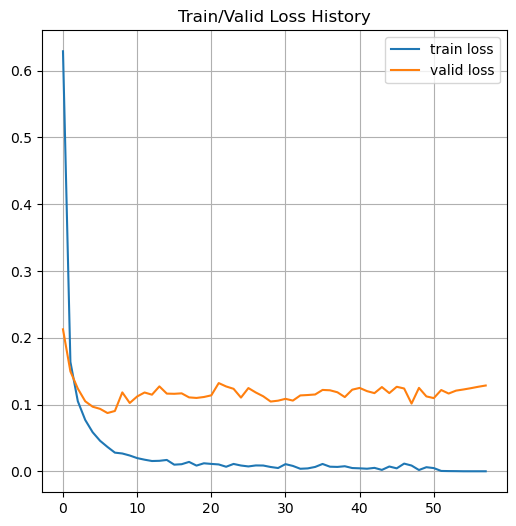

In [ ]:
plot_from = 0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title('Train/Valid Loss History')
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], 
         label='train loss')
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], 
         label='valid loss')

plt.legend()
plt.show()

훈련을 시킬때는 기울기 미분을 해줘야해.
검정할때는 기울기 미분 필요 없어..

In [29]:
test_loss=0.0
best_model.eval() #평가모드로 동작바꿔. 결과 값이 달라질수 있어서 아래와 같이 써

y_hat=[]

with torch.no_grad(): #미분그래프만들지 마, 결과값의 랜덤성, 일관성 바꾸지.x
  x_=x1[-1].split(batch_size, dim=0)
  y_=y1[-1].split(batch_size, dim=0)

  for x_i, y_i in zip(x_, y_):
    y_hat_i=best_model(x_i)
    loss=crit(y_hat_i, y_i.squeeze())
    #CrossEntropyLoss라면 y_i만 써도 괜찮아.
    test_loss+=float(loss)
    #float(loss) 보다 loss.item()이 적절
    y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat, dim=0) #세로로 붙힌다

print('test loss', test_loss)

test loss 0.07454150486155413


model.eval()  # 평가 모드 선언

test_loss = 0.0
y_hat = []

with torch.no_grad():
    x_ = x1[-1].split(batch_size, dim=0)
    y_ = y1[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i)   # squeeze 제거 권장
        test_loss += loss.item()
        y_hat.append(y_hat_i)

test_loss /= len(x_)
y_hat = torch.cat(y_hat, dim=0)

print('test loss', test_loss)


보완코드

In [30]:
print(y_hat) #소수점 쭈욱, 한행이 10개의 값
print(torch.argmax(y_hat, dim=-1)) #열단위로 하면 0, 행단위로 1또는 -1 이거 뭔말..
#모델의 최종 선택 결과(예측), 각 행에서 가장 큰 값의 인덱스

tensor([[ 6.2880e-02,  1.5669e+00,  3.7105e+00,  ...,  1.5495e+01,
          9.2052e-01,  5.8592e+00],
        [ 5.3251e-01,  6.5302e+00,  1.6687e+01,  ...,  3.7760e+00,
          1.8535e+00, -7.1291e-02],
        [ 8.3267e-01,  1.2503e+01, -1.7988e-02,  ...,  1.8846e+00,
          2.6980e+00, -3.1530e-02],
        ...,
        [-6.1474e-02,  1.7248e+00, -8.8084e-03,  ...,  9.4058e-01,
          1.5732e+00,  8.3937e+00],
        [-7.4252e-02,  1.2681e+00, -1.2748e-01,  ..., -1.4068e-01,
          1.1997e+01,  5.9576e+00],
        [ 4.8661e+00, -1.7740e-02,  1.0355e+00,  ..., -1.2043e-01,
          3.0231e+00, -2.8488e-02]])
tensor([7, 2, 1,  ..., 4, 5, 6])


In [31]:
print(y1[-1])

tensor([7, 2, 1,  ..., 4, 5, 6])


정답 라벨!!!!!!!!!!!!!!!!!

In [32]:
correct_cnt=(y1[-1]==torch.argmax(y_hat, dim=1)).sum()
print(correct_cnt/10000) #데이터가 몇개인지 아니까 만 나눠


tensor(0.9769)


정확도는 98%

얼마나 정확하게 찾았는지

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df=pd.DataFrame(confusion_matrix(y1[-1], torch.argmax(y_hat, dim=1)))
df

,0,1,2,3,4,5,6,7,8,9
0,964,1,2,0,3,1,4,0,4,1
1,0,1128,2,0,0,2,2,0,1,0
2,3,2,1010,4,3,0,0,1,9,0
3,0,0,5,991,0,2,0,4,5,3
4,1,1,2,0,956,0,1,2,2,17
5,3,0,0,15,1,863,3,0,2,5
6,1,2,0,1,10,4,937,0,3,0
7,1,3,11,11,1,0,0,993,3,5
8,0,0,4,4,2,6,2,1,950,5
9,5,6,0,4,6,2,1,5,3,977


행 -> 실제정답
열 -> 모델이 예측한 값
숫자 -> 그 경우가 몇번 나왔는지

A인 데이터가 모델에 의해 B로 예측된 갯수
-> 대각선 값이 클수록 그 클래스는 잘 맞춘 것 900~1100이상, 성능이 아주 좋다.